# imports

In [43]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

# data

In [44]:
# import the pg dataset
data=pd.read_csv("C:/Users/sonny/Desktop/pg.csv")

In [46]:
# see head of the pg dataset
data.head()

,Date,StationCode,Mw,Distance,Depth,PGV*,PGA*,PGD*,SI,Intensity,EqNo,StationNo,logpgv
0,20030926,ABSH01,8.0,324.368,42,4.270,9.487,13.212,1.632,2.608,9,1,0.630428
1,20030926,ABSH02,8.0,309.102,42,4.332,23.087,16.556,2.072,2.930,9,2,0.636688
2,20030926,ABSH03,8.0,300.591,42,4.863,22.948,12.430,2.309,2.766,9,3,0.686904
3,20030926,ABSH04,8.0,283.543,42,4.062,11.108,14.072,1.729,2.633,9,4,0.608740
4,20030926,ABSH05,8.0,277.031,42,6.082,33.258,18.366,3.137,3.151,9,5,0.784046


In [47]:
# check the shape of dataset
data.shape

(9734, 13)

In [48]:
data.columns

Index(['Date', 'StationCode', 'Mw', 'Distance', 'Depth', 'PGV*', 'PGA*',
       'PGD*', 'SI', 'Intensity', 'EqNo', 'StationNo', 'logpgv'],
      dtype='object')

In [49]:
data.dtypes

Date             int64
StationCode     object
Mw             float64
Distance       float64
Depth            int64
PGV*           float64
PGA*           float64
PGD*           float64
SI             float64
Intensity      float64
EqNo             int64
StationNo        int64
logpgv         float64
dtype: object

In [50]:
# number of values 
data.nunique()

Date             32
StationCode    1699
Mw               19
Distance       9627
Depth            22
PGV*           5389
PGA*           8724
PGD*           6300
SI             5201
Intensity      3514
EqNo             32
StationNo      1699
logpgv         5389
dtype: int64

In [52]:
# check the missing values
data.isnull().sum()

Date           0
StationCode    0
Mw             0
Distance       0
Depth          0
PGV*           0
PGA*           0
PGD*           0
SI             0
Intensity      0
EqNo           0
StationNo      0
logpgv         0
dtype: int64

In [53]:
#  view the data statistics
data.describe()

,Date,Mw,Distance,Depth,PGV*,PGA*,PGD*,SI,Intensity,EqNo,StationNo,logpgv
count,9.734000e+03,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000
mean,2.005772e+07,6.829577,233.684859,33.854120,4.691753,56.468966,19.164723,4.584135,2.957404,17.312616,843.887405,0.345960
std,3.518715e+04,0.929284,138.516240,29.130407,8.584313,121.900491,160.852094,8.958711,0.964564,9.272055,509.841937,0.497503
min,1.997033e+07,4.800000,8.445000,6.000000,0.076000,3.494000,0.017000,0.079000,0.359000,1.000000,1.000000,-1.119186
25%,2.003093e+07,6.200000,135.719750,12.000000,0.986000,9.148250,1.169250,0.981000,2.253250,9.000000,363.250000,-0.006123
50%,2.005082e+07,6.700000,202.581500,24.000000,1.988000,18.498000,2.658500,1.851000,2.791000,17.000000,841.000000,0.298416
75%,2.008091e+07,7.000000,300.436000,44.000000,4.447500,48.051000,7.981250,4.065000,3.533000,26.000000,1323.750000,0.648116
max,2.011041e+07,9.000000,804.170000,146.000000,165.185000,2765.242000,7920.919000,137.201000,6.673000,32.000000,1699.000000,2.217971


In [54]:
# find the correlation between the features
corr=data.corr()
corr.shape

(12, 12)

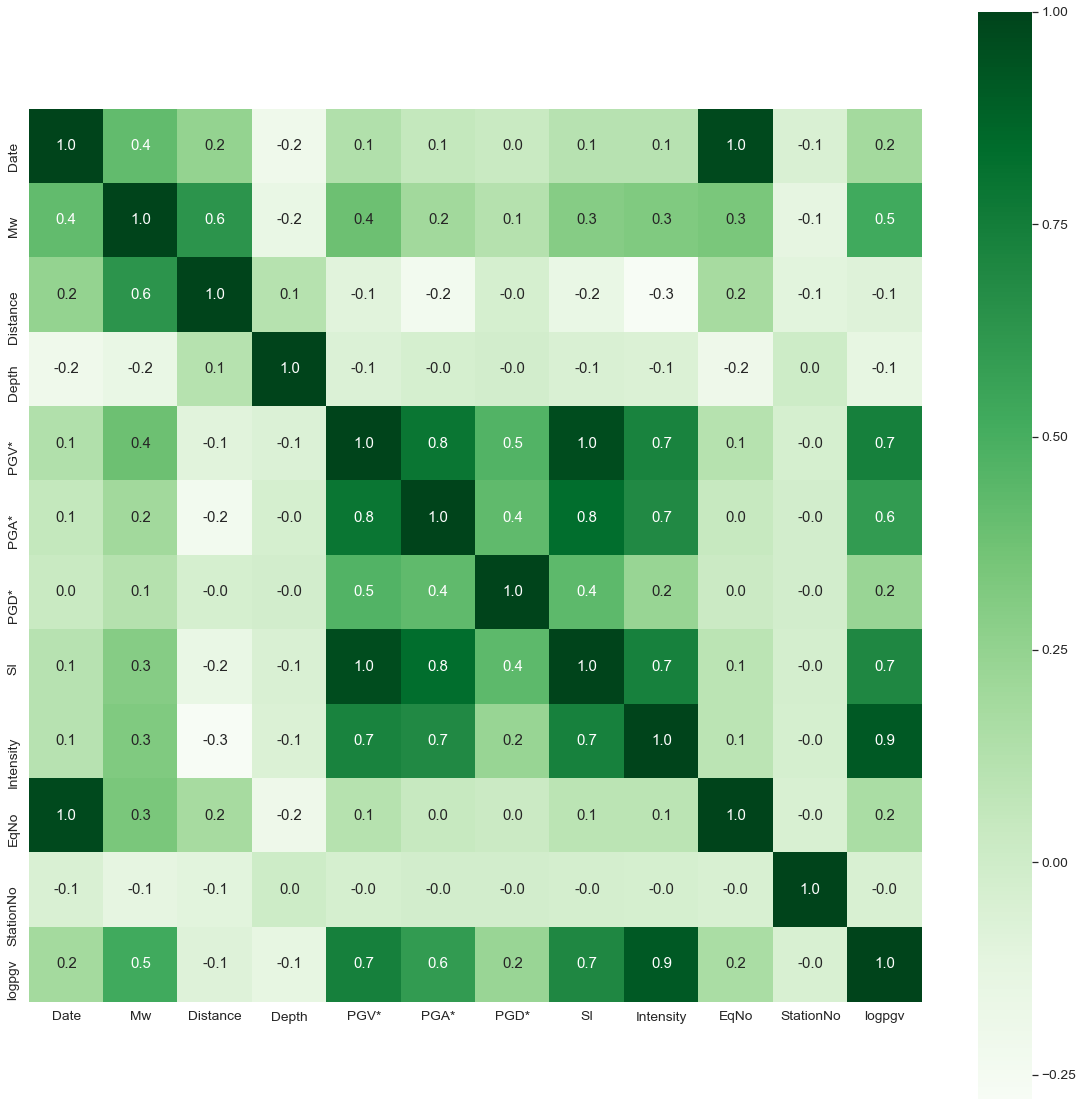

In [55]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [29]:
# overlook
print("-"*40)
data.info()
print("-"*40)

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 13 columns):
Date           9734 non-null int64
StationCode    9734 non-null object
Mw             9734 non-null float64
Distance       9734 non-null float64
Depth          9734 non-null int64
PGV*           9734 non-null float64
PGA*           9734 non-null float64
PGD*           9734 non-null float64
SI             9734 non-null float64
Intensity      9734 non-null float64
EqNo           9734 non-null int64
StationNo      9734 non-null int64
logpgv         9734 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 988.7+ KB
----------------------------------------


<Figure size 432x288 with 0 Axes>

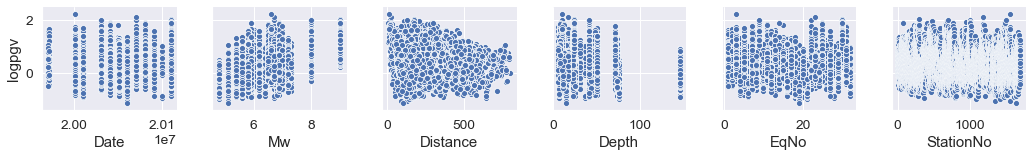

In [30]:
#  look at the relation between obejective and explainotary; logpgv

figure=plt.figure()
sns.pairplot(x_vars=['Date','Mw','Distance','Depth','EqNo','StationNo'],y_vars=['logpgv'],data=data,dropna=True)
plt.show()

<Figure size 432x288 with 0 Axes>

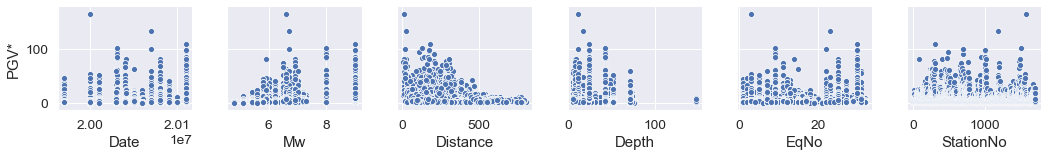

In [31]:
# look at the relation between obejective and explainotary; PGV*
figure=plt.figure()
sns.pairplot(x_vars=['Date','Mw','Distance','Depth','EqNo','StationNo'],y_vars=['PGV*'],data=data,dropna=True)
plt.show()

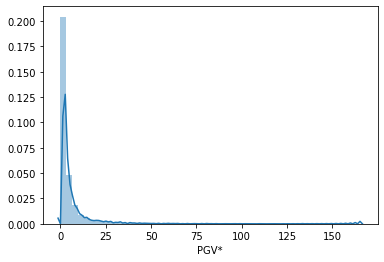

In [21]:
sns.distplot(data['PGV*'])

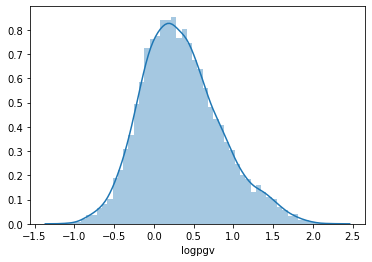

In [22]:
sns.distplot(data['logpgv'])

### the reason why logpgv, not PGV

In [70]:
# split objective variable and explainatory variables
column_sels=['Mw','Distance','Depth']
X=data.loc[:,column_sels]
y=data['logpgv']

In [72]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [80]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(7787, 3) (1947, 3) (7787,) (1947,)


# Model: LM

In [105]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.intercept_

-2.7695123207873382

In [107]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Mw,0.536729
1,Distance,-0.00259916
2,Depth,0.00173482


In [108]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [109]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5751923844067459
Adjusted R^2: 0.5750286399834157
MAE: 0.2578572080843959
MSE: 0.105313432303389
RMSE: 0.32452031107989066


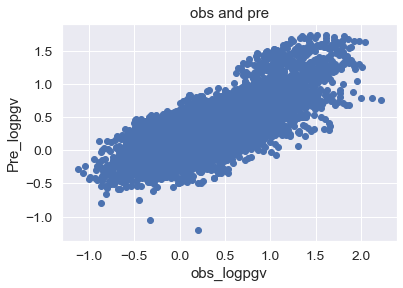

In [110]:
# Visualizing the differences between obs and pre; train data
plt.scatter(y_train, y_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre")
plt.show()

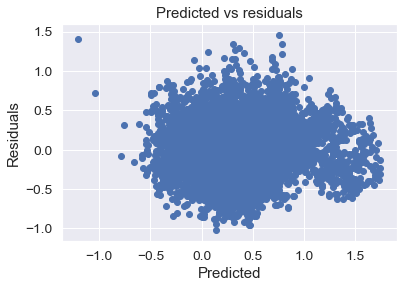

In [111]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

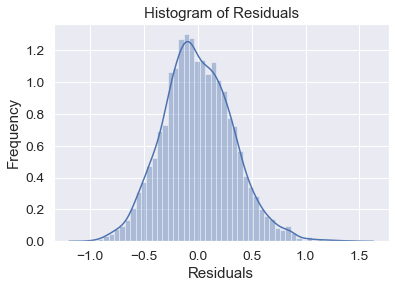

In [112]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [113]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

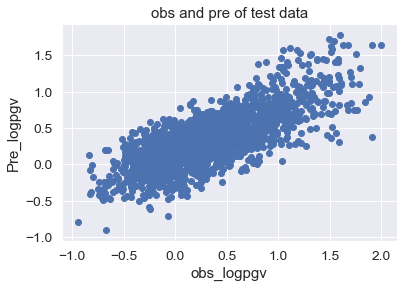

In [114]:
# Visualizing the differences between obs and pre; test data
plt.scatter(y_test, y_test_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of test data")
plt.show()

In [115]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5715758259963973
Adjusted R^2: 0.5709143373077659
MAE: 0.25897643120910047
MSE: 0.10526698876091573
RMSE: 0.32444874596909096


# Model:RF

In [116]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

C:\Users\sonny\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [117]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [118]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9403306285338094
Adjusted R^2: 0.9403076286475961
MAE: 0.0892109392787539
MSE: 0.014792546277012234
RMSE: 0.12162461213509473


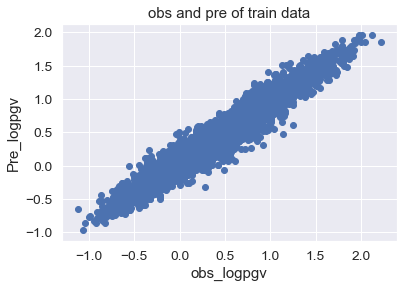

In [119]:
# Visualizing the differences between obs and pre; train data
plt.scatter(y_train, y_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of train data")
plt.show()

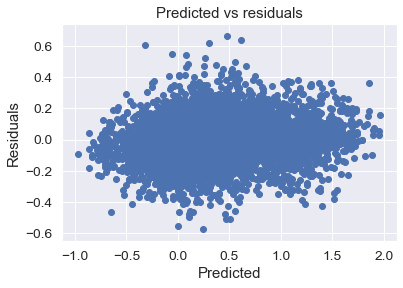

In [120]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [121]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [122]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6474981629169354
Adjusted R^2: 0.6469538986291077
MAE: 0.23368144187026793
MSE: 0.08661230895461347
RMSE: 0.29429969241338577


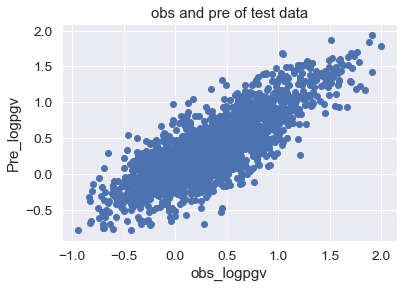

In [123]:
# Visualizing the differences between obs and pre; test data
plt.scatter(y_test, y_test_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of test data")
plt.show()

# Model:XGBoost Regressor

In [125]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [126]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [127]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8390992401639161
Adjusted R^2: 0.8390372200843186
MAE: 0.1557125404839242
MSE: 0.03988867114563649
RMSE: 0.1997214839360966


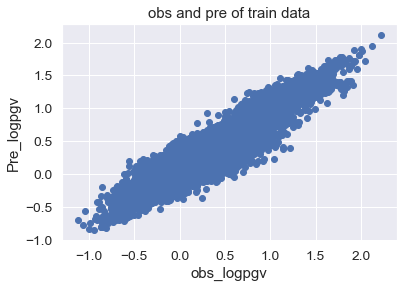

In [128]:
# Visualizing the differences between obs and pre; train data
plt.scatter(y_train, y_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of train data")
plt.show()

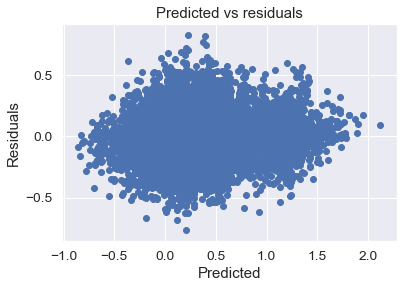

In [129]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [130]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)


In [131]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.714221414624351
Adjusted R^2: 0.7137801713118821
MAE: 0.21211403659238373
MSE: 0.0702179124341286
RMSE: 0.26498662689677116


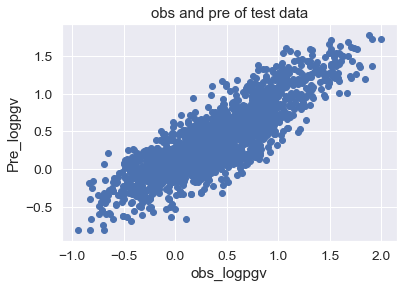

In [132]:
# Visualizing the differences between obs and pre; test data
plt.scatter(y_test, y_test_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of test data")
plt.show()

# Model:SVM Regressor

In [134]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [136]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [138]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7061822197656542
Adjusted R^2: 0.7060689660921731
MAE: 0.21497355321636055
MSE: 0.0728399345313742
RMSE: 0.26988874472896085


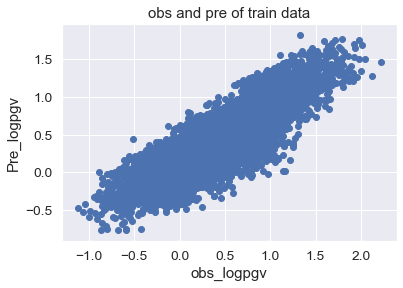

In [143]:
# Visualizing the differences between obs and pre; train data
plt.scatter(y_train, y_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of train data")
plt.show()

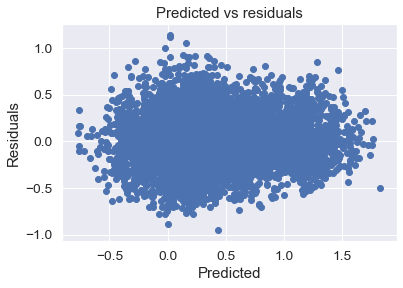

In [140]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [141]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [142]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7028409915411127
Adjusted R^2: 0.7023821768085463
MAE: 0.21788257473318082
MSE: 0.07301416657077689
RMSE: 0.270211336865752


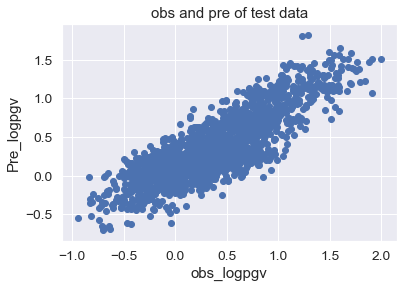

In [144]:
# Visualizing the differences between obs and pre; test data
plt.scatter(y_test, y_test_pred)
plt.xlabel("obs_logpgv")
plt.ylabel("Pre_logpgv")
plt.title("obs and pre of test data")
plt.show()

# R-squared score

In [145]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,71.422141
3,Support Vector Machines,70.284099
1,Random Forest,64.749816
0,Linear Regression,57.157583
